## Object-Image relationship
In geometric Optics, there is a simple expression that describes a general relationship among the object distance, image distance, and focal length.

$$ \frac{1}{s} + \frac{1}{s'} = \frac{1}{f} $$

where,

$ s $ - object distance <br>
$ s'$ - image distance <br>
$ f $ - focal length

Also the magnitude of an image can be expressed as,

$$ m = -\frac{s'}{s} $$

By a sign convention, the focal length, $ f $, is negative for a convex mirror. Also, for a spherical mirror, $ ƒ $ is related to the radius of curvature $ R $ by 

$$ f = \frac{R}{2}$$

---------------------------
## Notes
1. The formed image is virtual, since the image is behind the ornament, on the side opposite to the reflected light. (But the Christmas spirit is real, as my friend Hadi would say...!)
2. Axes limits and the text positions are set for this particular parameters, you might want to adjust the figures for other input values.
3. In reality, light reflecting off of the backside of the tree might not make it to the surface of the ornament to form an image.

---------------------------
##### (Scroll down to see the figures.)

<br>

In [140]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [141]:
s = 80   # object distance from the mirror
f = -1.5

In [231]:
def christmasTree(p, f):
    
    def sphericalMirror():
        
        u = np.linspace(0, 2*np.pi, N)
        v = np.linspace(0, np.pi, N)
        
        x0 = (2*f)*np.outer(np.cos(u), np.sin(v))
        y0 = (2*f)*np.outer(np.sin(u), np.sin(v))
        z0 = (2*f)*np.outer(np.ones(np.size(u)), np.cos(v))
        
        # original picture
        ax0.plot_surface(x0, y0, z0,  rstride=4, cstride=4, color='fuchsia', linewidth=0, alpha=0.4)
        ax0.text(-5.5, 0, abs(2*f)+3, 'ornament', color='dimgrey', size=11.5)
        
        # zoomed in picture
        ax1.plot_surface(x0, y0, z0,  rstride=4, cstride=4, color='fuchsia', linewidth=0, alpha=0.4)
        #ax1.text(-5.5, 0, abs(2*f)+3, 'ornament', color='dimgrey', size=11.5)
        
        # string
        x1 = np.zeros(N)
        y1 = np.zeros(N)
        z1 = np.linspace(abs(2*f), abs(2*f)+20, N)
        ax0.plot(x1, y1, z1, color='gold', linewidth=0.5)
        
        return
        
    def virtualImage():
    
        xImgPos = np.zeros(N)
        xImgNeg = np.zeros(N)
        yImg = np.zeros(N)
        zImg = np.zeros(N)    
        for j in range(N):
        
            p = y[j]
            q = (f*p)/(p-f)
            m = -q/p
        
            xImgPos[j] = m*xPos[j]
            xImgNeg[j] = m*xNeg[j]
            yImg[j] = q
            zImg[j] = m*z[j]
            
        return xImgPos, xImgNeg, yImg, zImg
    
    ### initialization
    fig0 = plt.figure(figsize=(10,8))
    ax0 = fig0.add_subplot(111, projection='3d')
    ax0.set_xlim(-50, 50)
    ax0.set_ylim(-10, 100)
    
    fig1 = plt.figure(figsize=(10,8))
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.set_xlim(-abs(2*f)+0.5, abs(2*f)-0.5)
    ax1.set_ylim(-1.5, -1.425)
    
    N = 100    
    R = [6, 15, 20, 25, 30]
    colors = ['limegreen', 'yellowgreen', 'seagreen', 'darkgreen']

    h0 = 10
    h = h0
    ax0.text(0, s+20, h+3, 'Christmas tree', color='dimgrey', size=11.5)
    ax0.text(-5.5, 0, abs(2*f)-9, 'image', color='dimgrey', size=11.5)
    for i in range(len(R)-1):
        for r in range(R[i]-5,R[i+1]):
            
            y = np.linspace((s-r), (s+r), N)
            xPos = np.sqrt(r**2-(y-s)**2)
            xNeg = -np.sqrt(r**2-(y-s)**2)
            z = np.zeros(N) + h
            h -= 1
            
            # plot object
            ax0.plot(xPos, y, z, color=colors[i])
            ax0.plot(xNeg, y, z, color=colors[i])
            
            # plot image
            xImgPos, xImgNeg, yImg, zImg = virtualImage()
            ax0.plot(xImgPos, yImg, zImg, color=colors[i])
            ax0.plot(xImgNeg, yImg, zImg, color=colors[i])      
            
            # zoomed in image
            xImgPos, xImgNeg, yImg, zImg = virtualImage()
            ax1.plot(xImgPos, yImg, zImg, color=colors[i])
            ax1.plot(xImgNeg, yImg, zImg, color=colors[i])                

    R0 = 7
    for h in range(h-9, h+1):
        
        y = np.linspace((s-R0), (s+R0), N)
        xPos = np.sqrt(R0**2-(y-s)**2)
        xNeg = -np.sqrt(R0**2-(y-s)**2)
        z = np.zeros(N) + h
        R0 -= 0.2
        
        # plot object
        ax0.plot(xPos, y, z, color='peru')
        ax0.plot(xNeg, y, z, color='burlywood')      
        
        # plot image
        xImgPos, xImgNeg, yImg, zImg = virtualImage()
        ax0.plot(xImgPos, yImg, zImg, color='peru')
        ax0.plot(xImgNeg, yImg, zImg, color='burlywood')      
        
        # zoomed in image
        xImgPos, xImgNeg, yImg, zImg = virtualImage()
        ax1.plot(xImgPos, yImg, zImg, color='peru')
        ax1.plot(xImgNeg, yImg, zImg, color='burlywood')      
        
    fig0.suptitle('Image of the Christmas tree formed by an ornament', fontsize=15)    
    ax0.set_ylabel('Tree is ' + str(h0-h) + ' units tall and ' + str(s) + ' units away from the ornament', fontsize=11, color='dimgrey') 
    ax0.set_xlabel('Radius of the ornament is ' + str(abs(2*f)) + ' units', fontsize=11, color='dimgrey') 
    
    # plot mirror
    sphericalMirror()
    pMax = s + 25
    pMin = s - 25
    qMax = (f*pMax)/(pMax-f)
    qMin = (f*pMin)/(pMin-f)
    width = abs(qMax-qMin)
    width = str('{:.2f}'.format(width))
    q0 = (f*s)/(s-f)
    m0 = -q0/s
    height = m0*(h0-h)
    height = str('{:.2f}'.format(height))
    fig1.suptitle('Christmas tree is appeared to be only ' + height + ' units tall and ' + width + ' units wide!', fontsize=15)  
        
    return


<IPython.core.display.Javascript object>


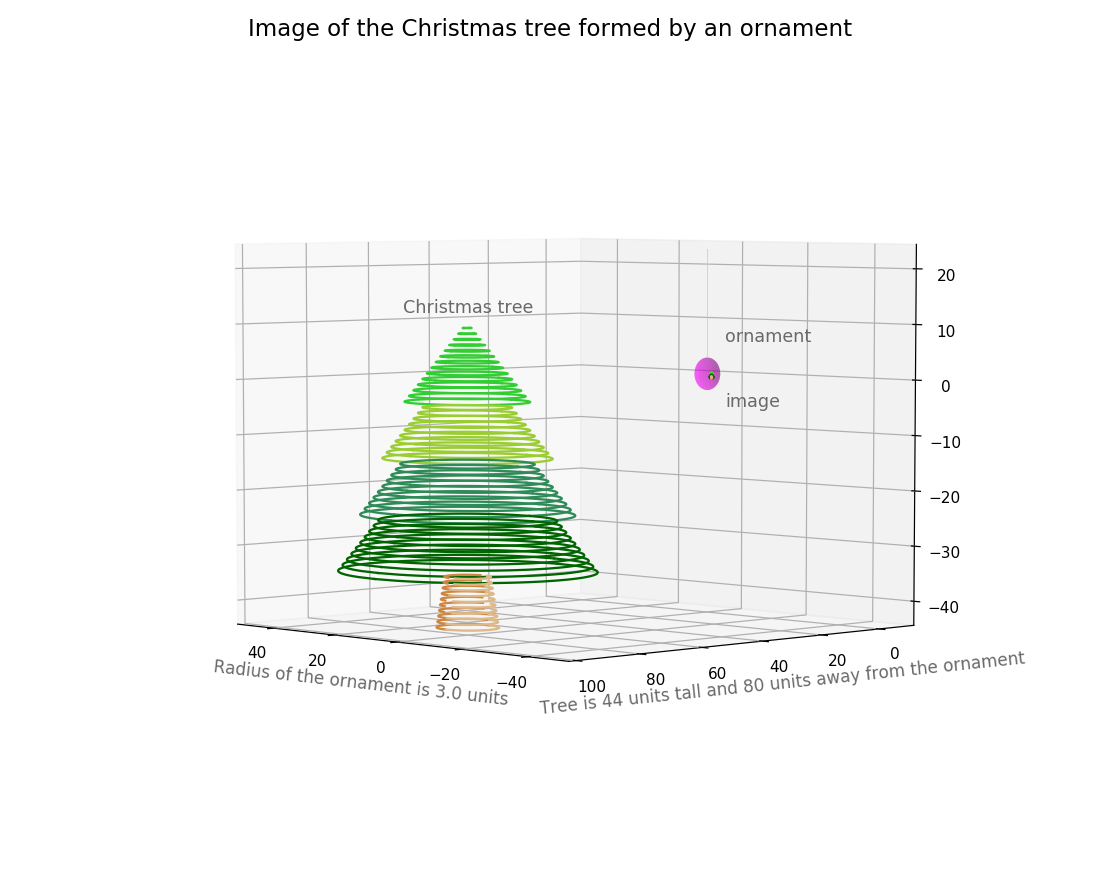

<IPython.core.display.Javascript object>


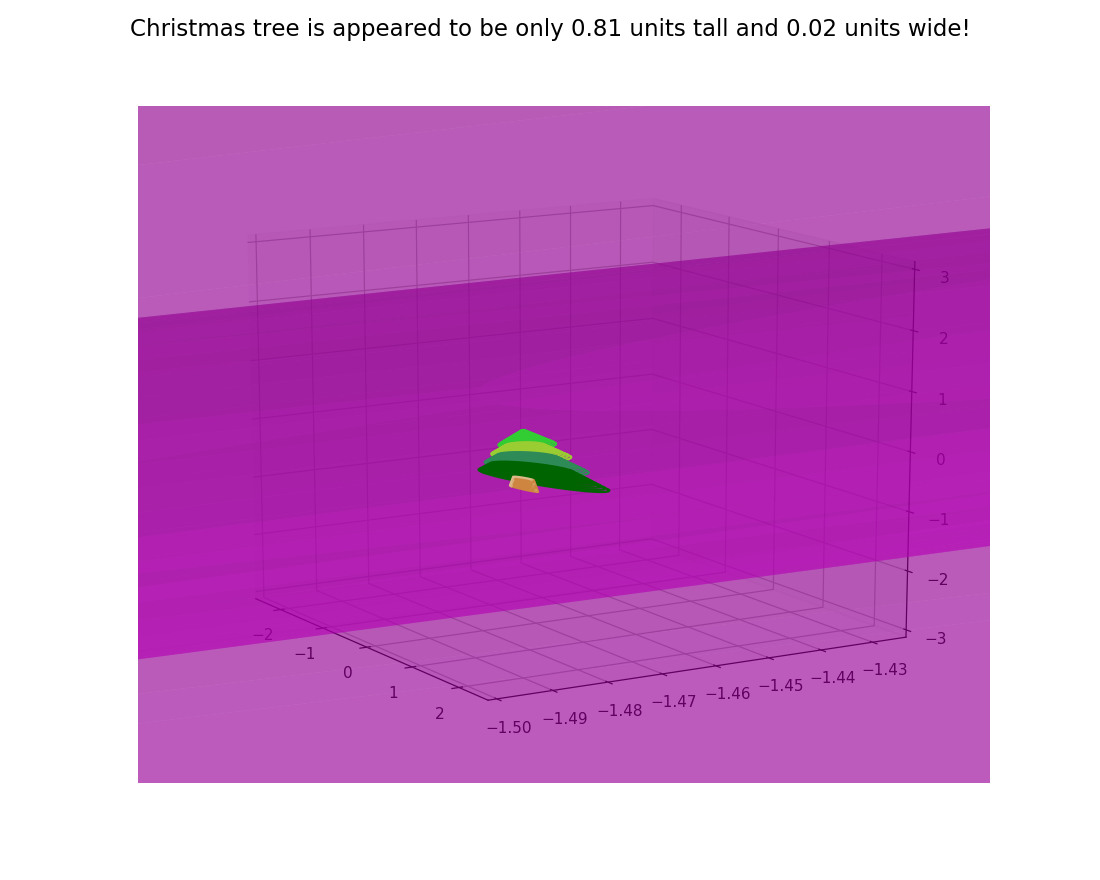

/home/tlim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in sqrt
/home/tlim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in sqrt


In [232]:
christmasTree(s,f)